지도 그리기 및 텍스트파일 분석_wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
jido_df=pd.read_csv('./관광지정보최종_240112.csv')

In [31]:
jido_df.head(5)

관광지명                           주소  \
0  성산일출봉(UNESCO 세계자연유산)  제주특별자치도 서귀포시 성산읍 일출로 284-12   
1            우도(해양도립공원)     제주특별자치도 제주시 우도면 삼양고수물길 1   
2                 사려니숲길  제주특별자치도 제주시 조천읍 교래리 산 137-1   
3                 카멜리아힐          제주 서귀포시 안덕면 병악로 166   
4                협재해수욕장   제주특별자치도 제주시 한림읍 한림로 329-10   

                                                상세정보  \
0  성산일출봉은 제주도의 다른 오름들과는 달리 마그마가 물속에서 분출하면서 만들어진 수...   
1  우도는 소가 누워있는 모양을 닮았다고 해서 일찍부터 소섬 또는 쉐섬으로 불리웠다. ...   
2  사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를 시작으로 물찻오름과 사...   
3  카멜리아힐은 동양에서 가장 큰 동백 수목원으로 토종 동백부터 아기 동백, 유럽 동백...   
4  반려동물의 경우, 해수욕장 개장 기간 내 지정 해수욕장 유영 구역의 입욕은 통제됩니...   

                                            해시태그_sub          평균별점    주소_동별  \
0          일출,오름,경관,포토,부모,자연경관,포토스팟,유네스코,무장애관광,공영관광지  별점(5점만점에 5점)  성산읍 성산리   
1  섬속의섬,경관,포토,아이,맑음,자연경관,포토스팟,어린이,봄꽃,유채꽃,유네스코,무장애...  별점(5점만점에 5점)  우도면 연평리   
2        숲길,걷기,등산,친구,커플,흐림,봄,자연경관,도보여행,도보,숲,단풍,공영관광지  별점(5점만점에 5점)  조천읍 교래리   
3  경관,포토,커플,아이,맑음,겨울,힐링,자연경관,포토스팟,어린이,어트랙션,동백,수국,...  별점(5점만점에 5점)  안덕면 상창리   
4  일몰,해수욕장,액티비티,아이,맑음,여름,자연경관,체험,레저,체험,해변,물놀이,어린이...  별점(5점만점에 5점)  한림읍 협재리   

                  연락처         위도          경도  \
0  (+82) 064-783-0959  33.462234  126.936801   
1  (+82) 064-728-1527  33.519472  126.951017   
2  (+82) 064-900-8800  33.407703  126.644672   
3  (+82) 064-800-6296  33.290140  126.368365   
4  (+82) 064-728-3981  33.393748  126.239432   

                                                해시태그  
0  ['#일출', '#오름', '#경관/포토', '#부모', '#자연경관', '#포토스...  
1  ['#섬속의섬', '#경관/포토', '#아이', '#맑음', '#자연경관', '#포...  
2  ['#숲길', '#걷기/등산', '#친구', '#커플', '#흐림', '#봄', '...  
3  ['#경관/포토', '#커플', '#아이', '#맑음', '#겨울', '#힐링', ...  
4  ['#일몰', '#해수욕장', '#액티비티', '#아이', '#맑음', '#여름',...

In [40]:
# 해시태그_sub 칼럼 데이터를 텍스트 파일로 저장하기
jido_df['해시태그_sub'].to_csv('해시태그_sub.txt',index=False, header=False)

In [44]:
#  텍스트 파일 불러오기
with open ('해시태그_sub.txt','rb') as file:
    b_text = file.read()
    text = b_text.decode('utf-8')

In [45]:
text

'"일출,오름,경관,포토,부모,자연경관,포토스팟,유네스코,무장애관광,공영관광지"\r\n"섬속의섬,경관,포토,아이,맑음,자연경관,포토스팟,어린이,봄꽃,유채꽃,유네스코,무장애관광,공영관광지"\r\n"숲길,걷기,등산,친구,커플,흐림,봄,자연경관,도보여행,도보,숲,단풍,공영관광지"\r\n"경관,포토,커플,아이,맑음,겨울,힐링,자연경관,포토스팟,어린이,어트랙션,동백,수국,무장애관광,반려동물,반려동물동반입장,혼저옵서개,반려동물동반_관광지"\r\n"일몰,해수욕장,액티비티,아이,맑음,여름,자연경관,체험,레저,체험,해변,물놀이,어린이,수상레저,반려동물,반려동물동반입장,혼저옵서개,반려동물동반_해변,반려동물동반_자연,반려동물동반_관광지"\r\n"해수욕장,액티비티,아이,맑음,여름,자연경관,체험,레저,체험,해변,물놀이,어린이,수상레저,반려동물,반려동물동반입장,반려동물동반_해변,반려동물동반_자연,무장애관광,반려동물동반_관광지,2022_마을산책_봄,Moment_봄"\r\n"해변,경관,포토,커플,여름,자연경관,포토스팟,해수욕장"\r\n"오름,걷기,등산,친구,맑음,가을,우수관광사업체,자연경관,억새,무장애관광"\r\n"일몰,밤,오름,걷기,등산,아이,봄,자연경관,도보여행,도보,어린이,억새,반려동물,반려동물동반입장,반려동물동반_오름,반려동물동반_자연,반려동물동반_관광지"\r\n"일출,해변,경관,포토,커플,맑음,가을,자연경관,포토스팟,봄꽃,유채꽃,반려동물,반려동물동반입장,반려동물동반_관광지,무장애관광,공영관광지"\r\n"테마공원,커플,친구,부모,아이,혼자,맑음,휴식,힐링,녹차,실내관광지,어트랙션,반려동물,반려동물동반입장,반려동물동반_관광지,무장애관광"\r\n"산,걷기,등산,경관,포토,친구,사계절,자연경관,포토스팟,한라산,언택트,단풍,유네스코"\r\n"테마공원,부모,커플,혼자,친구,아이,맑음,흐림,미술,박물관,실내,실내관광지,어트랙션,봄꽃,벚꽃,무장애관광"\r\n"테마공원,아이,맑음,봄,가을,겨울,실내관광지,어린이,어트랙션,무장애관광,우수관광사업체"\r\n"일출,밤,오름,걷기,등산,친구,가을,자연경

In [50]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',
    background_color='white',
    max_words=2000,
    # stopwords=
).generate(text)

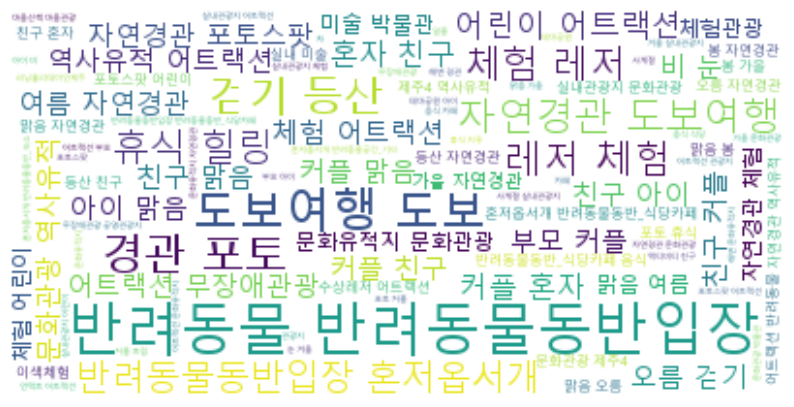

In [51]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
# 사용빈도 Top 30
count = 0
for key, val in wc.words_.items():
    print(f'{key} : \t{val}')
    count += 1
    if count >=30:
        break

반려동물 반려동물동반입장 : 	1.0
도보여행 도보 : 	0.6843853820598007
경관 포토 : 	0.5946843853820598
걷기 등산 : 	0.5647840531561462
자연경관 도보여행 : 	0.4950166112956811
레저 체험 : 	0.49169435215946844
휴식 힐링 : 	0.46511627906976744
체험 레저 : 	0.45182724252491696
반려동물동반입장 혼저옵서개 : 	0.4186046511627907
어린이 어트랙션 : 	0.3488372093023256
커플 혼자 : 	0.32558139534883723
혼자 친구 : 	0.3122923588039867
부모 커플 : 	0.2857142857142857
아이 맑음 : 	0.2724252491694352
친구 아이 : 	0.2724252491694352
커플 친구 : 	0.26245847176079734
자연경관 포토스팟 : 	0.2558139534883721
커플 맑음 : 	0.2558139534883721
문화관광 역사유적 : 	0.2425249169435216
역사유적 어트랙션 : 	0.23588039867109634
어트랙션 무장애관광 : 	0.23255813953488372
체험 어트랙션 : 	0.23255813953488372
친구 커플 : 	0.2292358803986711
오름 걷기 : 	0.21926910299003322
여름 자연경관 : 	0.20930232558139536
친구 맑음 : 	0.2026578073089701
비 눈 : 	0.19601328903654486
문화유적지 문화관광 : 	0.19601328903654486
맑음 여름 : 	0.19269102990033224
자연경관 체험 : 	0.19269102990033224


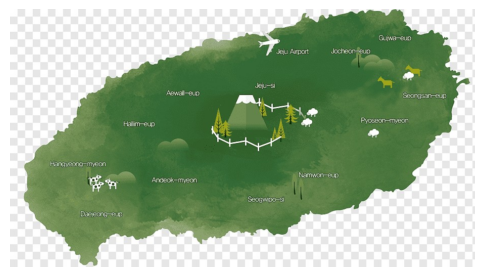

In [65]:
#  배경 그림위에 표시
mask = np.array(Image.open('제주_지도.jpg'))
plt.figure(figsize=(6,10))
plt.imshow(mask, cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')
plt.show()

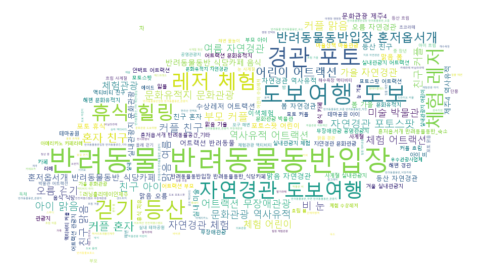

In [66]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',
    background_color="white",
    max_words=200,
    mask = mask
).generate(text)

plt.figure(figsize=(6,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
jido_df[jido_df['관광지명']=='부대악오름']

관광지명                           주소  \
938  부대악오름  제주특별자치도 제주시 조천읍 선흘리 산 103-1   

                                                  상세정보               해시태그_sub  \
938  오름은 주소가 산지로 되어있어, 내비게이션 검색시 정확한 위치를 알 수 없거나, 주...  오름,걷기,등산,자연경관,도보여행,도보   

         평균별점    주소_동별    연락처         위도          경도  \
938  별점(별점없음)  조천읍 선흘리  (+82)  33.447373  126.709534   

                                           해시태그  
938  ['#오름', '#걷기/등산', '#자연경관', '#도보여행', '#도보']

In [33]:
jido_df[jido_df['평균별점']=='별점(5점만점에 3점)'].count

<bound method DataFrame.count of            관광지명                           주소  \
492        귀덕연대   제주특별자치도 제주시 한림읍 귀덕14길 14-5   
493         귀빈사    제주특별자치도 제주시 구좌읍 비자림로 1456   
494     그대와함께라면           서귀포시 성산읍 환해장성로 929   
495        금능포구          제주특별자치도 제주시 한림읍 금능리   
496      김녕 청굴물     제주특별자치도 제주시 구좌읍 김녕리 1296   
497      김만덕기념관            제주특별자치도 제주시 산지로 7   
498  납읍난대림 금산공원   제주특별자치도 제주시 애월읍 납읍리 1457-1   
499      넌걸어난탈래       제주특별자치도 제주시 우도면 2395-5   
500       노을승마장  제주특별자치도 제주시 우도면 우도해안길 406-1   
501    노을해안1014   제주특별자치도 제주시 한경면 노을해안로 1014   
502  당케산물(당케포구)       제주특별자치도 서귀포시 표선면 표선당포로   
503        대정향교  제주특별자치도 서귀포시 안덕면 향교로 165-17   

                                                  상세정보  \
492  귀덕 연대는 명월진 소속의 별장 6명, 봉군 12명이 배치되어 6교대로 하루 종일 ...   
493  2004년 등록문화재 제 113호 제주 이승만별장으로 대한민국 근대문화유산으로 지정...   
494  성산일출봉, 섭지코지, 제주 아쿠아플라넷 인근에 위치한 해물라면집.\n\n해안 도로...   
495  금능포구는 금능으뜸원 해변이 3분 거리에 위치하고 있으며 시끌벅적 활기찬 해수욕장과...   
496  김녕 청굴물은 벽화마을에서 김녕해수욕장 방향으로 도보로 10분 정도 이동하여 마을 .

In [16]:
# 지도 표시하기__별점별로 나뉘어서 표시하기
map = folium.Map(location = [jido_df.위도.mean(), jido_df.경도.mean()], zoomstart = 20)

for i in jido_df.index:
    tooltip_text = f'<b>{jido_df.관광지명[i]}</b><br><b>{jido_df.평균별점[i]}</b><br>{jido_df.해시태그[i]}'

    if '별점(5점만점에 5점)' in jido_df['평균별점'][i]:
        folium.Marker(
            location = [jido_df['위도'][i], jido_df['경도'][i]], 
            tooltip = tooltip_text,
            icon=folium.Icon( color='lightred', icon= 'glyphicon-asterisk'),
            popup = '<a href="' + jido_df['상세페이지_url'] +'">Click me!</a>').add_to(map)
        
    elif '별점(5점만점에 4점)' in jido_df['평균별점'][i]:
        folium.Marker(
            location = [jido_df['위도'][i], jido_df['경도'][i]], 
            tooltip = tooltip_text,
            icon=folium.Icon( color='lightgreen', icon= 'glyphicon-cog'),
            popup = '<a href="' + jido_df['상세페이지_url'] +'">Click me!</a>').add_to(map)
        
    elif '별점(5점만점에 3점)' in jido_df['평균별점'][i]:
        folium.Marker(
            location = [jido_df['위도'][i], jido_df['경도'][i]], 
            tooltip = tooltip_text,
            icon=folium.Icon( color='purple', icon= 'glyphicon-star'),
            popup = '<a href="' + jido_df['상세페이지_url'] +'">Click me!</a>').add_to(map)
        
        
    
    elif  '별점(별점없음)'  in jido_df['평균별점'][i]:
        folium.Marker(
            location = [jido_df['위도'][i], jido_df['경도'][i]], 
            tooltip = tooltip_text,
            icon=folium.Icon( color='lightblue', icon= 'glyphicon-star-empty'),
            popup = '<a href="' + jido_df['상세페이지_url'] +'">Click me!</a>').add_to(map)
        

In [17]:
map